# <img src="https://img.icons8.com/dusk/64/000000/artificial-intelligence.png" style="height:50px;display:inline"> EE 046202 - Technion - Unsupervised Learning & Data Analysis

* Formerly 046193 

#### Tal Daniel

## Tutorial 04 - Classical Methods in Statistical Inference - Hypothesis Testing 2


### <img src="https://img.icons8.com/bubbles/100/000000/checklist.png" style="height:50px;display:inline"> Agenda

* Recap
    * Exercise
* T-Statistic
    * Example
* Other Statistical Tests
    * Pearsons's Chi-Squared ($\chi^2$) Test
    * Uniformly Most Powerful (UMP) Test
* Which Statistical Test To Use???

In [1]:
# imports for the tutorial
import numpy as np
import pandas as pd
from scipy.stats import t as t_dist
from scipy.stats import chi2
import matplotlib.pyplot as plt
%matplotlib notebook

## <img src="https://img.icons8.com/dusk/64/000000/rewind.png" style="height:50px;display:inline"> Recap
In the previous tutorial we described the framework of Hypothesis Testing. Following is a recap of some of the definitions and a brief summmary:

* **1. Null & Alternative Hypotheses** -  Formulate the null hypothesis $H_0$: $\theta \in \Theta_0$ (that the observations are the result of pure chance) and the alternative hypothesis $H_1$: $\theta \in \Theta_1$ (that the observations show a real effect combined with a component of chance variation).
* **2. Test Statistic** - Identify a test statistic that can be used to assess the truth of the null hypothesis. It is a value computed from sample data. The test statistic is used to assess the strength of evidence in support of a null hypothesis.
    * A **statistic** is a real-valued function of the data. For example, the sample mean: $W(X_1, X_2,..., X_n)= \frac{X_1 + X_2 + ... + X_n}{n}$ is a statistic.
    * A **test satistic** is a statistic on we which we build our test.
    * **Acceptence Region** $A$ - A *set* $A \subset \mathbb{R}$ is defined to be the set of all possible values of the test statistic for which we accept $H_0$.
    * **Rejection Region** $R$ - A *set*  $R = \mathbb{R} - A$ is defined to be the set of all possible values of the test statistic for which we reject $H_0$ and accept $H_1$. 

* **3. P-value & Interpretation** - Compute the P-value, which is the probability that a test statistic, at least as significant as the one observed, would be obtained assuming that the null hypothesis were true. The smaller the P-value, the stronger the evidence **against** the null hypothesis.

* **4. Significance Level** - Compare the p-value to an acceptable significance value $\alpha$ (sometimes called an $\alpha$ value, a probability threshold below which the null hypothesis will be rejected. Common values are 5% and 1%.). If $p \leq \alpha$ (the observed effect is statistically significant), the null hypothesis is ruled out, and the alternative hypothesis is valid.
    * Commonly used p-values:

|<center> P-Value &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; </center> |<center> Wording </center>|
| -----------------------------------------| --------------- |
|<center> $p > 0.05$ </center>| <center> Not Significant </center>|
|<center> $0.01 \leq p \leq 0.05$ </center>|<center> Significant</center>|
|<center> $0.001 \leq p < 0.01$</center>| <center> Very Significant </center>|
|<center> $p < 0.001$</center>| <center> Extremely Significant </center>|

**Error Types**: 


* **Type I Error (False Positive)** -  the incorrect rejection of a true null hypothesis. Usually a type I error leads one to conclude that a supposed effect or relationship exists when in fact it doesn't. 
    * For example, a test that shows a patient to have a disease when in fact the patient does not have the disease, a fire alarm going on indicating a fire when in fact there is no fire, or an experiment indicating that a medical treatment should cure a disease when in fact it does not.
    * The chance of **rejecting the null hypthesis $H_0$, when it is TRUE**, denoted by $\alpha$
    * $\rightarrow$ the chance of **accepting the null hypthesis $H_0$, when it is TRUE** is $1 - \alpha$
    * Formally:
        * Denote a *test statistic* as $W$
        * $P(\text{Type 1 Error} | \theta) = P(\text{Reject } H_0|\theta) = P(W \in R | \theta), \theta \in \Theta_0$
            * If $P(\text{Type 1 Error} | \theta) \leq \alpha, \forall \theta \in \Theta_0$, we say that the test has **significance level** $\alpha$.


   * **Type II Error (False Negative)** - the failure to reject a false null hypothesis.
      * For example, a blood test failing to detect the disease it was designed to detect, in a patient who really has the disease; a fire breaking out and the fire alarm does not ring; or a clinical trial of a medical treatment failing to show that the treatment works when really it does.
      * The chance of **not rejecting the null hypothesis $H_0$, when it is FALSE**, denoted by $\beta$
      * $\rightarrow$ the chance of **rejecting the null hypthesis $H_0$, when it is FALSE** is $1 - \beta$ (also called **power**)
      * Since the alternative hypothesis, $H_1$, usually contains more than one value of $\theta$, the probability of type II error is usually a **function of $\theta$**, and denoted by $\beta$.
      * Formally: $\beta(\theta) = P(\text{Accept } H_0 | \theta), \text{ for } \theta \in \Theta_1$


#### When To Use What:

* 2-sided hypothesis testing for the mean: $H_0: \mu=\mu_0, H_1: \mu \neq \mu_0$

| <center>Case </center>  | Test Statistic | Acceptance Region |
| ------ | --- | --- |
| $X_i \sim \mathcal{N}(\mu, \sigma)$, $\sigma$ **known** &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;| $W = \frac{\overline{X}  -\mu_0}{\frac{\sigma}{\sqrt{n}}}$| $\mid W \mid \leq z_{\frac{\alpha}{2}} $  |
|$n$ large, $X_i$ non-normal &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;| $W = \frac{\overline{X}  -\mu_0}{\frac{S}{\sqrt{n}}}$| $\mid W\mid \leq z_{\frac{\alpha}{2}} $  |


* 1-sided hypothesis testing for the mean: $H_0: \mu \leq \mu_0, H_1: \mu > \mu_0$

| <center>Case </center>  | Test Statistic | Acceptance Region |
| ------ | --- | --- |
| $X_i \sim \mathcal{N}(\mu, \sigma)$, $\sigma$ **known** &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;| $W = \frac{\overline{X}  -\mu_0}{\frac{\sigma}{\sqrt{n}}}$| $W \leq z_{\frac{\alpha}{2}} $  |
|$n$ large, $X_i$ non-normal &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;| $W = \frac{\overline{X}  -\mu_0}{\frac{S}{\sqrt{n}}}$| $W \leq z_{\frac{\alpha}{2}} $  |

* The only difference is the *absolute* sign on $W$

All expansions can be found <a href="https://www.probabilitycourse.com/chapter8/8_4_3_hypothesis_testing_for_mean.php">HERE</a>.

#### <img src="https://img.icons8.com/dusk/64/000000/task.png" style="height:30px;display:inline"> Exercise - How Much Protein Does a Tuna Fish Contain?
* Note: this is for all of you who work out :)

Assume that the amount of protein in a Tuna-can is a Gaussian random variable with std $\sigma=2.5$ grams (that is, the variance is *known*) and *unknown* expectation $\mu$. We are interested in the following hypothesis: $$ H_0: \mu=30 $$ $$ H_1 : \mu=32 $$

1. The following test is proposed: take 16 random cans (samples are i.i.d.), if the mean is greater than 30.8 grams, reject $H_0$. What is the probability of type 1 error? What is the probability of type 2 error?
2. We decided to use a different test: reject $H_0$ in case $\overline{X}_n > 31.3$. Can you say if type 1 or 2 error probabilities will increase or decrease without further computations?

#### <img src="https://img.icons8.com/dusk/64/000000/idea.png" style="height:30px;display:inline"> Solution

#### Section 1

Since each sample is Gaussian, and the samples are i.i.d., the empirical average $\overline{X}_n$ of 16 samples is also Gaussian, with the **same** mean, and std of $\frac{\sigma}{\sqrt{16}}$: $$ \overline{X}_n \sim \mathcal{N} (\mu, \frac{2.5^2}{16}) $$ (Z-test)

* **Type-1-error** (False Positive) $ = P_{H_0}(\overline{X}_n > 30.8)$ $$ = P(\frac{\overline{X}_n-\mu_{H_0}}{2.5 / \sqrt{16}} > \frac{30.8 - \mu_{H_0}}{2.5 / \sqrt{16}})$$ $$ = P(\frac{\overline{X}_n-30}{2.5 / \sqrt{16}} > \frac{30.8 - 30}{2.5 / \sqrt{16}})$$ $$ = P(Z>1.28) = 1 - P(Z <1.28) = 1 - \Phi(1.28) = 0.1 $$
    * $\Phi(x) = \frac{1}{\sqrt{2\pi}}\int_{-\infty}^x \exp(\frac{-x^2}{2})dx$
    * <a href="https://en.wikipedia.org/wiki/Standard_normal_table#Cumulative">Comulative distribution function of a standard normal distribution</a>

* **Type-2-error** (False Negative) $=P_{H_1}(\overline{X}_n \leq 30.8)$ $$ =P(\frac{\overline{X}_n-\mu_{H_1}}{2.5 / \sqrt{16}} \leq \frac{30.8 - \mu_{H_1}}{2.5 / \sqrt{16}}) $$ $$ = P(\frac{\overline{X}_n-32}{2.5 / \sqrt{16}} \leq \frac{30.8 - 32}{2.5 / \sqrt{16}}) $$ $$ = P(Z \geq 1.92) = 1 -  P(Z \leq 1.92) = 1 - \Phi(1.92) = 0.0274 $$

#### Section 2    

We increased the threshold, such that it less likely to reject $H_0$. That is, the event in which $H_0$ is true, and we reject it is more rare. This means that type-1 error must *decrease*, i.e, we will make less False-Positive mistakes. However, the event in which we accept $H_0$ while $H_1$ is true is **more likely** (notice the trade-off between the error types). This means that the type-2 error must increase, and we will make more False-Negative mistakes.
This demnostrates the inherent **trade-off** between type-1 and type=2 errors.

## <img src="https://img.icons8.com/dusk/64/000000/t.png" style="height:50px;display:inline"> T-Test (Hypothesis Testing of Gaussian with Unknown Mean and Variance)
The $t$-test deals with the scenraio where both the mean and variance are unknown.
* Assume we are given data $\{X_i\}_{i=1}^N$, where $X_i \sim \mathcal{N}(\mu, \sigma^2)$. Both $\mu$ and $\sigma^2$ are unknown.
* Let the empirical mean and variance be: $$ \overline{X}_N = \frac{1}{N}\sum_{i=1}^N X_i $$ $$ \overline{\sigma}_N^2 = \frac{1}{N-1} \sum_{i=1}^N (X_i -\overline{X}_N)^2 $$

* Assume we wish to test the following 2-sided null and alternative hypotheses given the data: $$ H_0: \mu = \mu' $$ $$ H_1 : \mu \neq \mu' $$
* The $t$-test statistic is defined by: $$ t=\frac{\overline{X}_N - \mu'}{\overline{\sigma}_N} $$
    * The $t$-test is $|t| < C$, that is, we **reject** $H_0$ if $|t| \geq C$

In general, there are three possible alternative hypotheses and rejection regions:

|**Alternative Hytpothesis** | **Rejection Region**|
|----------------------------|---------------------|
|<center>$H_a: \mu_1 \neq \mu_2$</center>    | <center>$\mid T \mid > t_{n-1, 1-\frac{\alpha}{2}}$ </center>|
|<center>$H_a: \mu_1 > \mu_2$</center>    | <center>$T > t_{n-1, 1-\alpha}$ </center>|
|<center>$H_a: \mu_1 < \mu_2$</center>    | <center>$T < t_{n-1, \alpha}$ </center>|

<a href="https://www.itl.nist.gov/div898/handbook/eda/section3/eda353.htm">More Details</a>

#### <img src="https://img.icons8.com/dusk/64/000000/task.png" style="height:30px;display:inline"> Exercise - Statistics for Machine Learning
In this exercise we will use the $t$-test to estimate the performance of two classifiers on a single domain. The data is taken from "Evaluating Learning Algorithms - A Classification Perspective", N.Japkowicz, M.Shah.
* **Preview**: Two data samples are matched if they come from repeated observation of the same subject. Given two types of samples, we want to test whether the difference in means between these two samples is *significant*. One way of doing so is by looking at the difference in observed means and standard deviations (the first and second moments of the samples) between these two samples.
* In **classification** problems, we often try out different classifiers (which are the output of different learning algorithms) and check their performance. Eventually, we wish to choose the best classifier (the one with the lowest classification error).

* Consider two classifiers and their performance on the data. **How can we tell if one is better than the other?**
* The null hypothesis, $H_0$, will be that the classifiers are equivalent and we will see if we can reject $H_0$.
* Let $\mathcal{X}, \mathcal{Y}$ be the feature space and the label space accordingly. Let $f: \mathcal{X} \to \mathcal{Y}$ be a classifier. Denote the validation data (the data on which is not seen during training, but is used to tune the hyper-parameters of the algorithms) as $\mathcal{D} = \{x_i, y_i\}_{i=1}^n$.
* Define our **performance measure** (pm): $$ pm_i(f) = \begin{cases} 1, \quad f \text{ classified incorrectly } x_i \\ 0, \quad \text{otherwise} \end{cases} $$ 
* The *average* performance measure of $f$: $$ \overline{pm}(f) = \frac{1}{n}\sum_{i=1}^n pm_i(f) $$

* Performance *difference* measures of two classifier $f_1$ and $f_2$: $$ d_i = pm_i(f_1) - pm_i(f_2) $$ $$ \overline{d} = \overline{pm}(f_1) - \overline{pm}(f_2) $$
* Define the t-statistics (as we do not know the mean nor the std): $$ t = \frac{\overline{d} - 0}{\tilde{\sigma}_d / \sqrt{n}} $$
    * $\tilde{\sigma}_d^2 = \frac{1}{n-1} \sum_{i=1}^n (d_i -  \overline{d})^2$
    * Recall that our null hypothesis, $H_0$ is that the classifiers are equivalent, thus, the expected difference between their performance mesures is 0.
    
* The data: performance measures of 10 cross-validation sets on some given data. The algorithms were repeated for 10 trials, and the performance was measured in each case. The values are *emprical risks* - the error.


In [2]:
# let's see the data
data = pd.read_csv('./datasets/ml_classifiers.csv')
data

,Trial No.,Classifiers,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10
0,1,c4.5,0.5000,0.0000,0.3333,0.0000,0.3333,0.3333,0.3333,0.2,0.2,0.2
1,1,RIP,0.3333,0.5000,0.0000,0.0000,0.3333,0.5000,0.1667,0.0,0.2,0.0
2,1,NB,0.1667,0.0000,0.0000,0.0000,0.0000,0.1667,0.0000,0.4,0.0,0.0
3,2,c4.5,0.3333,0.1667,0.1667,0.3333,0.3333,0.0000,0.0000,0.0,0.2,0.2
4,2,RIP,0.3333,0.1667,0.0000,0.0000,0.3333,0.1667,0.0000,0.2,0.2,0.0
5,2,NB,0.3333,0.0000,0.1667,0.1667,0.0000,0.0000,0.0000,0.0,0.0,0.0
6,3,c4.5,0.0000,0.0000,0.3333,0.3333,0.1667,0.3333,0.1667,0.0,0.2,0.2
7,3,RIP,0.0000,0.0000,0.1667,0.3333,0.1667,0.1667,0.1667,0.2,0.4,0.2
8,3,NB,0.0000,0.0000,0.0000,0.0000,0.0000,0.1667,0.0000,0.0,0.0,0.0
9,4,c4.5,0.5000,0.1667,0.3333,0.1667,0.0000,0.1667,0.5000,0.2,0.2,0.4


In [3]:
# for a certain classifier:
data.where(data['Classifiers'] == 'NB').dropna()  # without dropna(), it will show NaN on other rows

,Trial No.,Classifiers,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10
2,1.0,NB,0.1667,0.0000,0.0000,0.0000,0.0000,0.1667,0.0000,0.4,0.0,0.0
5,2.0,NB,0.3333,0.0000,0.1667,0.1667,0.0000,0.0000,0.0000,0.0,0.0,0.0
8,3.0,NB,0.0000,0.0000,0.0000,0.0000,0.0000,0.1667,0.0000,0.0,0.0,0.0
11,4.0,NB,0.3333,0.0000,0.0000,0.1667,0.0000,0.0000,0.0000,0.0,0.0,0.2
14,5.0,NB,0.0000,0.1667,0.0000,0.0000,0.1667,0.0000,0.0000,0.0,0.0,0.4
17,6.0,NB,0.0000,0.0000,0.1667,0.0000,0.1667,0.1667,0.0000,0.0,0.0,0.0
20,7.0,NB,0.1667,0.1667,0.1667,0.0000,0.1667,0.3333,0.3333,0.0,0.2,0.0
23,8.0,NB,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.2,0.2
26,9.0,NB,0.0000,0.0000,0.0000,0.1667,0.0000,0.0000,0.0000,0.0,0.0,0.2
29,10.0,NB,0.5000,0.1667,0.0000,0.0000,0.0000,0.0000,0.1667,0.2,0.2,0.0


#### Questions:
1. Map the problem to the framework of Hypothesis Testing, with a test in the form of a t-test.
2. Define $d_i$ as the *average* difference per trial. Calculate $d_i$ between the classifier c4.5 and NB for every one of the 10 given trials.
3. Calculate $\overline{d}, \tilde{\sigma}_d^2$ and $t$.
4. For the significane levels of $\alpha=0.05$, do the two classifiers have similar performance?

#### <img src="https://img.icons8.com/dusk/64/000000/idea.png" style="height:30px;display:inline"> Solution

#### Section 1

We ask a question about the *random variable* $d_i$. $d_i$ measures the performance difference of the algorithms when they are trained on a specific realization of the data (which is an RV). Our null hypothesis, $H_0$, is that  $\mu_{d_i} = 0$ - the two classifiers are similar. However, we do not know the variance of the random variable. We can assume that: $$ d_i \sim \mathcal{N} (\mu', \sigma) $$ where the parameters are unknown. This assumption makes sense in the *limit of large data* and under the (wrong) assumption that each entry of the table is drawn independently from a Gaussian distribution. Since we do not know the variance, this framework exactly fits the t-test framework.

#### Section 2

Recall that $d_i$ is the difference in performance measure between the two classifiers. We are given 10 partitions of the dataset (for cross-validation) and we also perform 10 trials. Thus, $d_i$ is the difference of performance in the $i^{th}$ trial, and we calculate it as the average over cross-validations sets. $$ d_i = \frac{1}{10} \sum_{j=1}^{10} pm_{i,j} (c4.5) -pm_{i,j} (NB) $$
Where $j$ is the index of the cross-valdiation set.

In [4]:
# let's calculate all of the d_i
nb_data = data.where(data['Classifiers'] == 'NB').dropna().drop(columns=['Trial No.', 'Classifiers']).mean(axis=1).values
c45_data = data.where(data['Classifiers'] == 'c4.5').dropna().drop(columns=['Trial No.', 'Classifiers']).mean(axis=1).values
d = c45_data - nb_data
print("differnce in performance measure for c4.5 and NB:")
for i in range(len(d)):
    print("d_{} = {}".format(i + 1, d[i]))

differnce in performance measure for c4.5 and NB:
d_1 = 0.16998000000000005
d_2 = 0.10665999999999999
d_3 = 0.15666
d_4 = 0.19334
d_5 = 0.08999999999999998
d_6 = 0.19
d_7 = 0.053330000000000016
d_8 = 0.11000999999999997
d_9 = 0.22999
d_10 = 0.17333


#### Section 3

Let's calculate $\overline{d}, \tilde{\sigma}_d^2$ and $t$. Recall:

* Define our **performance measure** (pm): $$ pm_i(f) = \begin{cases} 1, \quad f \text{ classified incorrectly } x_i \\ 0, \quad \text{otherwise} \end{cases} $$ 
* The *average* performance measure of $f$: $$ \overline{pm}(f) = \frac{1}{n}\sum_{i=1}^n pm_i(f) $$
* Performance *difference* measures of two classifier $f_1$ and $f_2$: $$ d_i = pm_i(f_1) - pm_i(f_2) $$ $$ \overline{d} = \overline{pm}(f_1) - \overline{pm}(f_2) $$
* Define the t-statistics (as we do not know the mean nor the std): $$ t = \frac{\overline{d} - 0}{\tilde{\sigma}_d / \sqrt{n}} $$
* $\tilde{\sigma}_d^2 = \frac{1}{n-1} \sum_{i=1}^n (d_i -  \overline{d})^2$

In [5]:
# let's calculate the wanted terms
d_avg = d.mean()
print("d_average: ", d_avg)

var_d = (1 / (len(d) - 1)) * np.sum(np.square(d - d_avg))
print("empirical variance of d: ", var_d)
print("empirical std of d: ", np.sqrt(var_d))

t_test = (d_avg - 0) / (np.sqrt(var_d) / np.sqrt(len(d)))
print("t = ", t_test)

d_average:  0.14733000000000002
empirical variance of d:  0.0030239951333333338
empirical std of d:  0.054990864089713425
t =  8.472286722254982


#### Section 4

After calculating $t$, all that is left to be done is analyzing the distribution of $t$, which we know has the form of the **student-t distribution** with $n-1$ degrees of freedom (notice that for $n \to \infty$ the student-t distribution approaches the Normal distribution). In our case, $n=10$, since we averaged 10 RVs.

* For two-tailed alternative hypothesis - we can read the value of $t_{n-1,1- \frac{\alpha}{2}}$ which set the t-test to have a certain size: $$ P(t > t_{n-1, 1- \frac{\alpha}{2}} ) = 1- \frac{\alpha}{2} $$ Since we wish to have a test with size $\alpha = 0.05$, we read the value: $$ t_{n-1, 1- \frac{\alpha}{2}} = t_{9, 1-0.025} $$

In [6]:
alpha = 0.05
t_value = t_dist.ppf(1-alpha/2, df=len(d)-1)  # Percent point function (inverse of cdf — percentiles)
print("t value: ", t_value)

t value:  2.2621571627409915


So we got that: $$ t_{n-1,1- \frac{\alpha}{2}} = t_{9,1- 0.025} = 2.26 $$ And the test takes the following form: **reject** the null hypothesis $H_0$ if $$ |t| > t_{n-1, \frac{\alpha}{2}} = 2.26 $$

Therfore, given the test size, $\alpha = 0.05$, we reject $H_0$ and conclude that NB and c4.5 peform differently.

#### Section 4 Continued

* For one-sided alternative hypothesis ($\mu_1 > \mu_2 \rightarrow \overline{d} > 0$) - we can read the value of $t_{n-1, 1-\alpha}$ which set the t-test to have a certain size: $$ P(t > t_{n-1, 1-\alpha} ) = 1-\alpha $$ Since we wish to have a test with size $\alpha = 0.05$, we read the value: $$ t_{n-1, 1- \alpha} = t_{9, 0.05} $$

In [7]:
alpha = 0.05
t_value = t_dist.ppf(1-alpha, df=len(d)-1)  # Percent point function (inverse of cdf — percentiles)
print("t value: ", t_value)

t value:  1.8331129326536335


So we got that: $$ t_{n-1, 1-\alpha} = t_{9, 1-0.05} = 1.833 $$ And the test takes the following form: **reject** the null hypothesis $H_0$ if $$ t > t_{n-1, 1-\alpha} = 1.833 $$

Therfore, given the test size, $\alpha = 0.05$, we reject $H_0$ and conclude that NB performs consistently *better* than c4.5 (since the expected error rate of c4.5 is higher).

## <img src="https://img.icons8.com/bubbles/50/000000/test-tube.png" style="height:50px;display:inline"> Pearson's Chi-Squared ($\chi^2$) Test
* *Pearson’s chi-squared* test is a statistical test applied to sets of **categorical data** to evaluate how likely it is that any observed difference between the sets arose by chance.
    * **Categorical data** - data consisting of categorical variables (a variable that can take on one of the limited possible values).
        * For example - subway usage on specific days:
      
|Average Weekday| Average Saturday| Average Sunday|
|---------------|-----------------|---------------|
| 5,284,295     | 3,202,388       | 2,555,814     |



* By using Pearson’s chi-squared test we can accept or reject the null hypothesis, $H_0$. Usually, a null hypothesis represented in the way of an expected set of data, and alternative hypothesis, $H_1$, as some newly observed data.
* The Chi-Squared Statistic: $$ \chi^2 = \sum_{i=1}^n \frac{(O[i] - E[i])^2}{E[i]} $$
    * $O[i]$ - Observed data ($i^{th}$ category).
    * $E[i]$ - Expected data (for the $i^{th}$ category).
* We will use the **Chi-squared distribution function** with $n-1$ degrees of freedom (DOF), where $n$ is the number of categories.
* For a **significance level** $\alpha$, we reject the null hypothesis, $H_0$ if the chi-squared statistic is *above* the **critical value**.
    * The **critical value** is calculated using the Chi-squared distribution function for a certain siginificance level.

#### Example  - Dropout/Graduation Rates

Consider the following data about dropout/graduation rates (which will serve as our null hypothesis).

|First Year Dropout| Second Year Dropout| Third Year Dropout|Fourth Year Dropout|Graduated|
|------------------|--------------------|-------------------|-------------------|---------|
|0.2               | 0.1                | 0.15              | 0.05              | 0.5     |

Recently, a research was conducted and the observed data from a sample size of $N=2000$ was:

|                |First Year Dropout| Second Year Dropout| Third Year Dropout|Fourth Year Dropout|Graduated|
|----------------|------------------|--------------------|-------------------|-------------------|---------|
|Number of People|543               | 145                | 210               | 110               | 992     |

Assuming the old data was corerct ($H_0$), what would the expected data look like?

|                |First Year Dropout| Second Year Dropout| Third Year Dropout|Fourth Year Dropout|Graduated| Total|
|----------------|------------------|--------------------|-------------------|-------------------|---------|------|
|Observed        |543               | 145                | 210               | 110               | 992     |2000  |
|Expected        |$2000 \cdot 0.2=400$|$2000 \cdot 0.1=200$|$2000 \cdot 0.15=300$|$2000 \cdot 0.05=100$|$2000 \cdot 0.5=1000$     |2000  |

We will now perform the Chi-squared test for a significance level $\alpha = 0.05$

In [8]:
# chi-squared test
num_categories = 5
dof = num_categories - 1 # degrees of freedom
alpha = 0.05
observed = [543, 145, 210, 110, 992]
expected = [400, 200, 300, 100, 1000]
# compute chi-squared statistic
chi_square_stat = np.sum((np.array(observed) - np.array(expected))**2 / np.array(expected))
print("chi-squared statistic value: ", chi_square_stat)

# compute critical value using the inverse of the CDF
critical_value = chi2.ppf(q=1-alpha, df=dof)
print("critical value: ", critical_value)

if chi_square_stat > critical_value:
    print("H_0 is rejected!")
else:
    print("H_0 is accepted!")

chi-squared statistic value:  94.3115
critical value:  9.487729036781154
H_0 is rejected!


Text(0.5, 1.0, 'Chi-Squared Acceptance/Rejection Regions for alpha = 0.05')

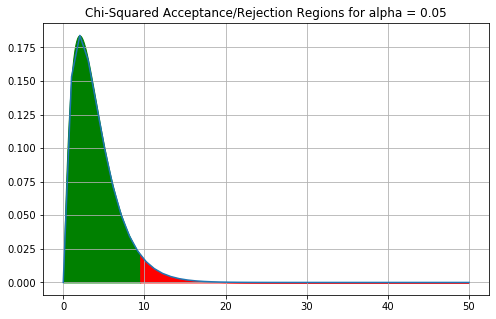

In [9]:
# plot rejection/acceptance regions
x = np.linspace(0, 50)
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
ax.plot(x, chi2.pdf(x, df=dof))

accept_region_xs = np.arange(0, critical_value, 0.001)
ax.fill_between(accept_region_xs, chi2.pdf(accept_region_xs, df=dof), color='green')
reject_region_xs = np.arange(critical_value, 50, 0.001)
ax.fill_between(reject_region_xs, chi2.pdf(reject_region_xs, df=dof), color='red')
ax.grid()
ax.set_title("Chi-Squared Acceptance/Rejection Regions for alpha = 0.05")

## <img src="https://img.icons8.com/dusk/50/000000/flex-biceps.png" style="height:50px;display:inline"> Uniformly Most Powerful Test (UMP)
* A Uniformly Most Powerful (UMP) test has the most statistical power from the set of all possible alternate hypotheses of the same size $\alpha$.
* The UMP doesn’t always exist, especially when the test has nuisance variables (variables that are irrelevant to your study but that have to be be accounted for).
* However, if the UMP does exist, you can use the Neyman-Pearson lemma (NPL) to find it.
* A UMP test is usually defined in terms of a uniformly most powerful rejection region (UMPCR) (also called a “critical region”).
    * A region $C$ of size $\alpha$ is the UMPCR for testing a simple null hypothesis against a set of alternate hypotheses if it is the “best” critical region.
    * The “best” critical region is one that minimizes the probability of making a Type I or a Type II error.
        *  In other words, the UMPCR is the region that gives the smallest chance of making a Type I or II error. It is also the region that gives a UMP test the largest (or equally largest) power function.
* Formal definition: a test defined by a critical region $C$ of size $\alpha$ is a uniformly most powerful (UMP) test if it is a most powerful test against each simple alternative in the alternative hypothesis $H_A$. The critical region $C$ is called a uniformly most powerful critical region of size $\alpha$.

* UMP and the **Neyman-Pearson Lemma**:
    * The Neyman-Pearson lemma can tell you the best hypothesis test if you have a simple null hypothesis and a simple alternative hypothesis. 
        * If you have multiple hypotheses (also called a composite hypothesis), the NPL can be extended to all individual alternate hypotheses. 
        * Composite hypotheses have multiple options for solutions. For example, $\sigma^2 > 8$ is a composite hypothesis because it doesn’t specify a value for $\sigma^2$
    * The basic idea is that you test each simple hypothesis in turn to see if it is the UMP out of all possibilities.
    * Formally:
        * Let $C$ be a class of tests for testing $H_0$: $\theta \in \Theta_0$ versus $H_1$: $\theta \in \Theta^c_1$. A test in class $C$, with power function $\beta(\theta)$, is a uniformly most powerful (UMP) class $C$ test if $\beta(\theta) \geq \beta'(\theta)$ for every $\theta \in \Theta^c_0$ and every $\beta'(\theta)$ that is a power function of a test in class $C$.
        * In more simple terms, this is really just telling you that the UMP test is the one with the biggest power function (out of all tests of the same size $\alpha$). $\Theta_0$ is the set of all possible values for $\theta$ under the null hypothesis.
        * The same statement can be rewritten using the **likelihood ratio test**. Let’s say you had two simple hypotheses $H_0$: $\theta = \theta_0$ and $H_1$:$\theta = \theta_1$. In order to find the most powerful test at a certain $\alpha$ level (with threshold $\eta$), you would look for the likelihood-ratio test which rejects the null hypothesis in favor of the alternate hypothesis when: $$ \Lambda(x) = \frac{L(x|\theta_0)}{L(x|\theta_1)} \leq \eta $$ Where $$P(\Lambda(X) \leq \eta|H_0) = \alpha $$
            * $L$ is the likelihood function.
        
* <a href="https://newonlinecourses.science.psu.edu/stat414/node/308/"> Exercise Example </a>

## <img src="https://img.icons8.com/bubbles/100/000000/ask-question.png" style="height:50px;display:inline"> Which Statistical Test To Use???

<img src="./assets/tut_04_how_to_choose.png" style="height:500px">

* <a href="http://isoconsultantpune.com/hypothesis-testing/">Image Source</a>
* Video: https://www.youtube.com/watch?v=rulIUAN0U3w

### <img src="https://img.icons8.com/bubbles/50/000000/video-playlist.png" style="height:50px;display:inline"> Recommended Videos

#### <img src="https://img.icons8.com/cute-clipart/64/000000/warning-shield.png" style="height:30px;display:inline"> Warning!
* These videos do not replace the lectures and tutorials.
* Please use these to get a better understanding of the material, and not as an alternative to the written material.

#### Video By Subject

* t-Test - <a href="https://www.youtube.com/watch?v=AGh66ZPpOSQ">T-Tests: A Matched Pair Made in Heaven</a>
* $\chi^2$-Test - <a href="https://www.youtube.com/watch?v=WXPBoFDqNVk">Chi-squared Test</a>

## <img src="https://img.icons8.com/dusk/50/000000/prize.png" style="height:50px;display:inline"> Credits
* Examples, exercises and definitions from <a href="https://probabilitycourse.com/">Introduction to Probability, Statistics and Random Processes</a> - https://probabilitycourse.com
* <a href="https://medium.com/@geekrodion/statistics-pearsons-chi-squared-test-95fe36d74c1c">Pearson's chi-squared test</a> by Rodion Chachura
* <a href="https://www.statisticshowto.datasciencecentral.com/ump-uniformly-most-powerful/">Uniformly Most Powerful (UMP) Test </a> by Statistics How To
* Icons from <a href="https://icons8.com/">Icon8.com</a> - https://icons8.com
* Datasets from <a href="https://www.kaggle.com/">Kaggle</a> - https://www.kaggle.com/